# Linear Regression using python

This is a program to predict the brain weight of a person depending upon his/her head size. The dependent variable here is the brain weight and the independent variable is the head size. 

The following code is a direct mathematical implementation of linear regression without the use of machine learning libraries.
Only data gathering, manipulation and visualization libraries are used in this example.

In [3]:
# imports and initializations

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Collection of the data

To collect the data, I am using the pandas library and reading the csv file using the funtion read_csv provided by pandas. The collected dataframe is stored in the data variable and consequently, the data.shape shows the rows and columns in the collected dataframe. The data.head() function prints a part of the dataframe in a tabular form.

In [4]:
# reading the csv file for gathering the data
data = pd.read_csv('./assets/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Collecting the Dependent and Independent Variables

The independent variable in this example is the head size. Thus, It will be plotted on the x- axis of the regression plot. Subsequently, the dependent variable is the brain weight which will be plotted on the y- axis. 

In [5]:
# Collecting X and Y values from the dataframe
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

## Mathematical Implementation of Linear Regression

The mathematical implementation of the Algorithm is explained below:

### Equation of the Regression Line
    y = mx + c, is the equation of the Regression Line 
    where,
    y -> dependent variable, or the value being predicted by the predictor
    x -> independent variable
    m -> slope of the regression line
    c -> y intercept

### Formulae required for the Algorithm


The following formulae are to be used for finding the linear regression line using the Least Squared Method:

#### 1. Finding the slope and y- intercept of the best fit line
##### a. Slope, m:
$$
    m = \frac{\sum{(x-\bar x)(y-\bar y)}}{\sum{(x-\bar x)^2}}
$$
where, $ \bar x $ and $ \bar y $ are the mean of x and y respectively
##### b. y-intercept, c:
$$
    c = \bar y - m \cdot \bar x 
$$

#### 2. Goodness of fit using the $ R^2 $ method

Checking the best fit line for its accuracy. R-squared value is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination. Generally, the higher the $ R^2 $ value, the better the model and inversely, the lower it is, the worse the model. This however, is not a stringent rule and a model can have a low $ R^2 $ value and still be a good model and vice versa.

The following formula is used to calculate the R-squared (or, $ R^2 $ ) value:

$$
  R^2 = \frac{\sum{(y_p - \bar y)^2}}{\sum{(y - \bar y)^2}}
$$

## 1. Finding the best fit line

In [6]:
# finding the mean of X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# total number of values in the dataframe

n = len(X)

# As per the formula for finding the slope of the best fit line given in notes above

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

# Print the coefficients
print("m =", m, "c =",  c)

m = 0.26342933948939945 c = 325.57342104944223


## Using matplotlib to visualize the results of the Linear Regression Algorithm

The following graph shows the best fit line to show the regression and a set of scatter points to show the actual values in the data set. 

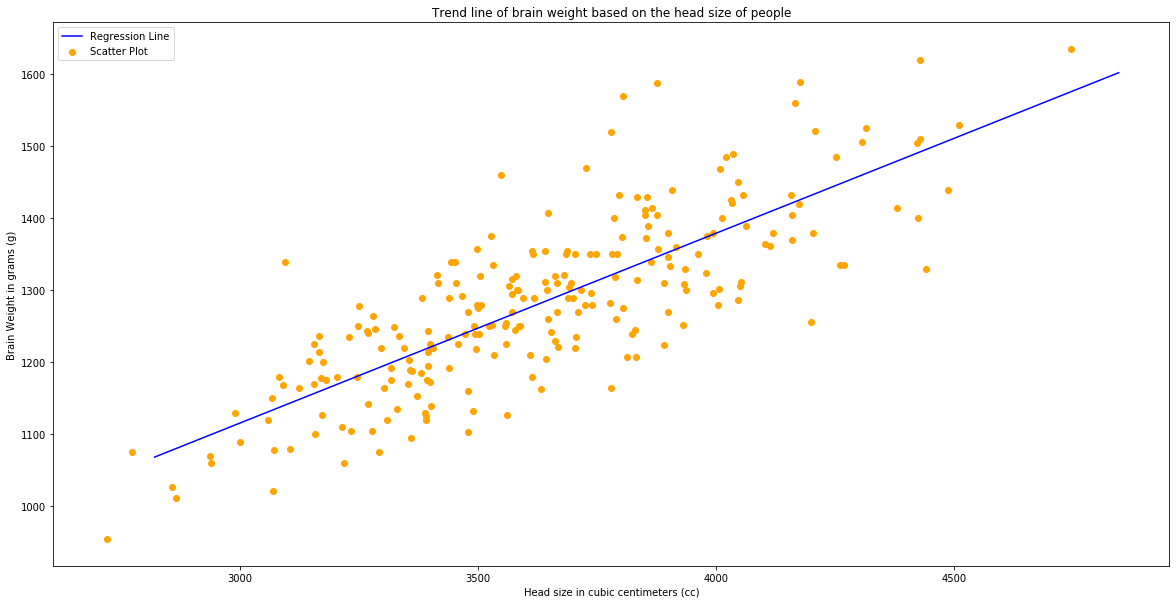

In [7]:
# Plotting the actual values and the regression line of best fit

max_x = np.max(X) + 100
min_x = np.min(X) + 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000) # return evenly spaced numbers withing given range (min x to max x interval = 1000)
y = m * x + c

# Plotting the regression line
plt.plot(x, y, color='blue', label='Regression Line')
# Plotting the scatter points
plt.scatter(X, Y, c='orange', label='Scatter Plot')

# Setting up the labels, title andlegend of the figure
plt.title('Trend line of brain weight based on the head size of people')
plt.xlabel('Head size in cubic centimeters (cc)')
plt.ylabel('Brain Weight in grams (g)')
plt.legend()
plt.show()

## 2. Goodness of fit

Lets find the measure of $ R^2 $ to determine the performance of our model.

In [8]:
# total sum of squares of residuals, numerator of the R-squared formula given in notes above
ss_r = 0 
# total sum of squares,  denominator of the R-squared formula given in notes above
ss_t = 0

# As per the R-squared formula, given in the notes above
for i in range(n):
    y_pred = c + m * X[i]
    # summation of the numerator
    ss_r +=  (y_pred - mean_y) ** 2
    # summation of the denominator
    ss_t += (Y[i] - mean_y) ** 2
        
# R-squared
r2 = (ss_r/ ss_t)

# Printing the resultant Goodness of Fit
print(r2)

0.6393117199570001


# Using Scikit Learn to Calculate the R2-score 

We found the best fit line and $ R^2 $ score of our model in the previous step by using the mathematical formula. In this section, we shall use the Scikit Library to achieve the same using its inbuilt methods

In [9]:
# imports for the scikit library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Since Rank 1 matrices are unusable in sklearn, we have to reshape it
X1 = X.reshape((n, 1))

# Creating our model
reg = LinearRegression()

# Fitting the training data
reg = reg.fit(X1, Y)

# Prediction of Y
Y_pred = reg.predict(X1)

# Calculating R2 score
r2_score =  reg.score(X1, Y)

print(r2_score)

0.639311719957
